## Linear Regression using Gradient Descent

<b>Data set:</b> (https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices)


##### This project is to compare the results of the Java project.

In [964]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split

In [965]:
# Import the data set
data = pd.read_csv("./data/autos.csv")

data.drop(data.index[1000:], inplace=True)
# Get info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                1000 non-null   int64 
 1   dateCrawled          1000 non-null   object
 2   name                 1000 non-null   object
 3   seller               1000 non-null   object
 4   offerType            1000 non-null   object
 5   price                1000 non-null   int64 
 6   abtest               1000 non-null   object
 7   vehicleType          882 non-null    object
 8   yearOfRegistration   1000 non-null   int64 
 9   gearbox              938 non-null    object
 10  powerPS              1000 non-null   int64 
 11  model                949 non-null    object
 12  kilometer            1000 non-null   int64 
 13  monthOfRegistration  1000 non-null   int64 
 14  fuelType             908 non-null    object
 15  brand                1000 non-null   object
 16  notRepa

In [966]:
#Create column that represents the age of the vehicle
vehicleAge = []
for num in data["yearOfRegistration"]:
    vehicleAge.append(2023 - num)

data['vehicleAge'] = vehicleAge


In [967]:
#Convert kilometers to miles
miles = []
for num in data["kilometer"]:
    miles.append(round(num*0.62))

data['miles'] = miles

In [968]:
data.head(10)

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,vehicleAge,miles
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,30,93000
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,12,77500
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,19,77500
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,22,93000
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,15,55800
5,5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,...,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07,28,93000
6,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,...,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39,19,93000
7,7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,...,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58,43,24800
8,8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,...,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13,9,18600
9,9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,...,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06,25,93000


In [969]:
#Drop features that are not needed
data.drop(['index', 'dateCrawled', 'name', 'offerType', 'seller', 'abtest', 'yearOfRegistration', 'kilometer', 'monthOfRegistration', 
           'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen', 'model'], axis=1, inplace=True)

data.head()

,price,vehicleType,gearbox,powerPS,fuelType,brand,vehicleAge,miles
0,480,NaN,manuell,0,benzin,volkswagen,30,93000
1,18300,coupe,manuell,190,diesel,audi,12,77500
2,9800,suv,automatik,163,diesel,jeep,19,77500
3,1500,kleinwagen,manuell,75,benzin,volkswagen,22,93000
4,3600,kleinwagen,manuell,69,diesel,skoda,15,55800


In [970]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   price        1000 non-null   int64 
 1   vehicleType  882 non-null    object
 2   gearbox      938 non-null    object
 3   powerPS      1000 non-null   int64 
 4   fuelType     908 non-null    object
 5   brand        1000 non-null   object
 6   vehicleAge   1000 non-null   int64 
 7   miles        1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [971]:
#Drop all Null values
data.dropna(inplace=True)

#Drop any outliers in the vehicleAge column
data.drop(data[(data['vehicleAge'] < 0) | (data['vehicleAge'] > 75)].index, inplace=True)

data.drop(data[(data['price'] > 100000) | (data['price'] < 5000)].index, inplace=True)

data.drop(data[(data['powerPS'] < 70)].index, inplace=True)

In [972]:
data.head()

,price,vehicleType,gearbox,powerPS,fuelType,brand,vehicleAge,miles
1,18300,coupe,manuell,190,diesel,audi,12,77500
2,9800,suv,automatik,163,diesel,jeep,19,77500
8,14500,bus,manuell,125,benzin,ford,9,18600
14,17999,suv,manuell,190,diesel,nissan,12,43400
18,7550,bus,manuell,136,diesel,ford,16,93000


In [973]:
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 1 to 990
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   price        309 non-null    int64 
 1   vehicleType  309 non-null    object
 2   gearbox      309 non-null    object
 3   powerPS      309 non-null    int64 
 4   fuelType     309 non-null    object
 5   brand        309 non-null    object
 6   vehicleAge   309 non-null    int64 
 7   miles        309 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 21.7+ KB


,price,vehicleType,gearbox,powerPS,fuelType,brand,vehicleAge,miles
count,309.000000,309,309,309.000000,309,309,309.000000,309.000000
unique,NaN,8,2,NaN,4,28,NaN,NaN
top,NaN,limousine,manuell,NaN,diesel,volkswagen,NaN,NaN
freq,NaN,101,200,NaN,155,57,NaN,NaN
mean,12779.789644,NaN,NaN,164.737864,NaN,NaN,15.741100,67106.472492
std,9343.438931,NaN,NaN,66.583308,NaN,NaN,6.585425,28377.108426
min,5000.000000,NaN,NaN,71.000000,NaN,NaN,8.000000,3100.000000
25%,7000.000000,NaN,NaN,120.000000,NaN,NaN,12.000000,43400.000000
50%,9900.000000,NaN,NaN,150.000000,NaN,NaN,15.000000,77500.000000
75%,14650.000000,NaN,NaN,197.000000,NaN,NaN,17.000000,93000.000000


Distribution of vehicle type


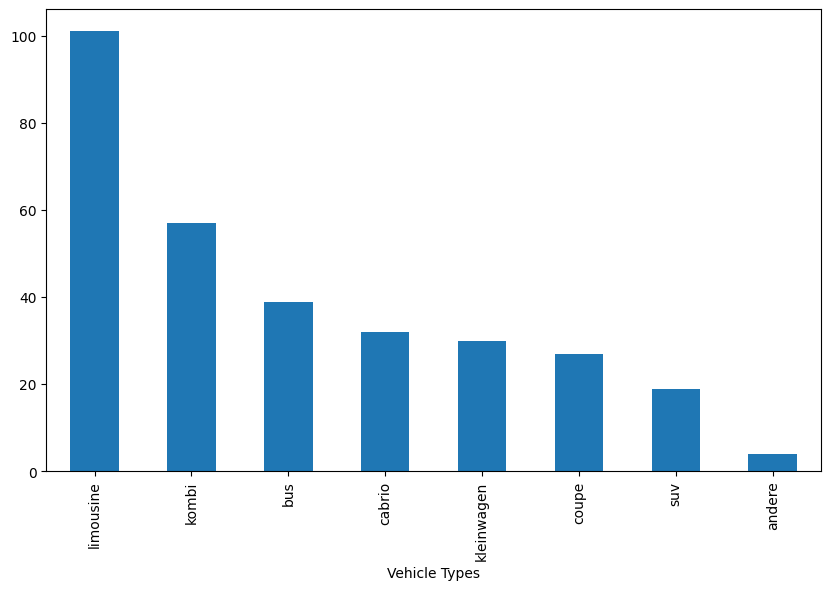

In [974]:
data['vehicleType'].value_counts().plot(kind='bar', xlabel="Vehicle Types")
print("Distribution of vehicle type")

Distribution of vehicle models


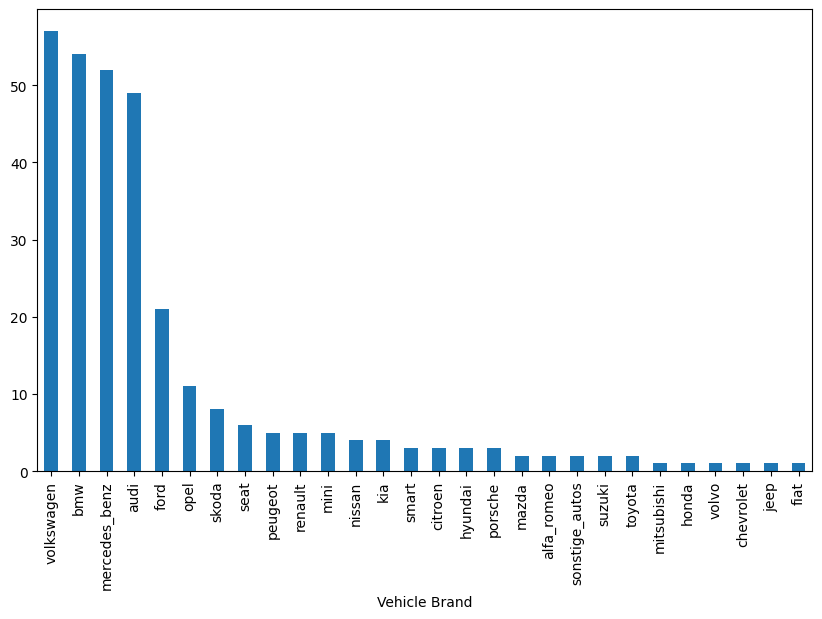

In [975]:
data['brand'].value_counts().plot(kind='bar', xlabel="Vehicle Brand")
print("Distribution of vehicle models")

Distribution of vehicle Fuel Types


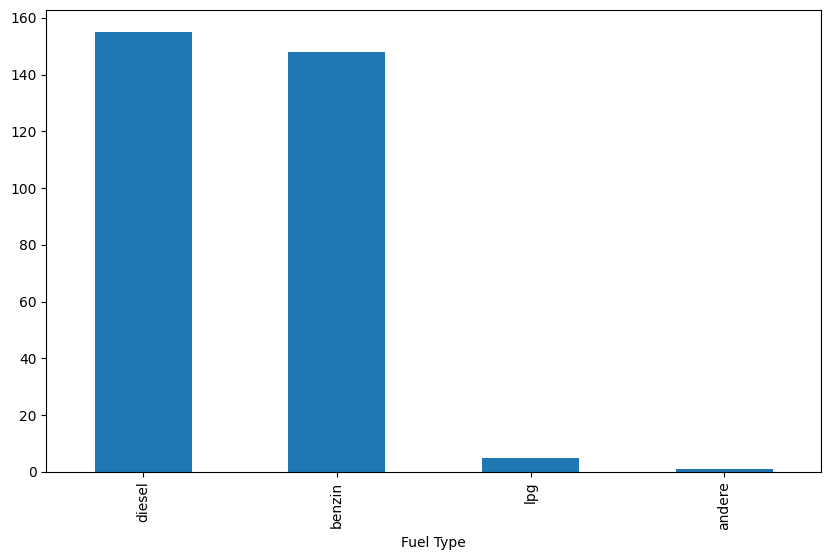

In [976]:
data['fuelType'].value_counts().plot(kind='bar', xlabel="Fuel Type")
print("Distribution of vehicle Fuel Types")

In [977]:
#Catagorize objects into numerical values
columns = ['vehicleType', 'gearbox', 'fuelType', 'brand']

le = LabelEncoder()

for feature in columns:
    data[feature] = le.fit_transform(data[feature])

In [978]:
data.head()

,price,vehicleType,gearbox,powerPS,fuelType,brand,vehicleAge,miles
1,18300,3,1,190,2,1,12,77500
2,9800,7,0,163,2,9,19,77500
8,14500,1,1,125,1,6,9,18600
14,17999,7,1,190,2,15,12,43400
18,7550,1,1,136,2,6,16,93000


The below heat map shows a correlation between features. powerPs and fuelType provide the most infuence towards the price of the car.


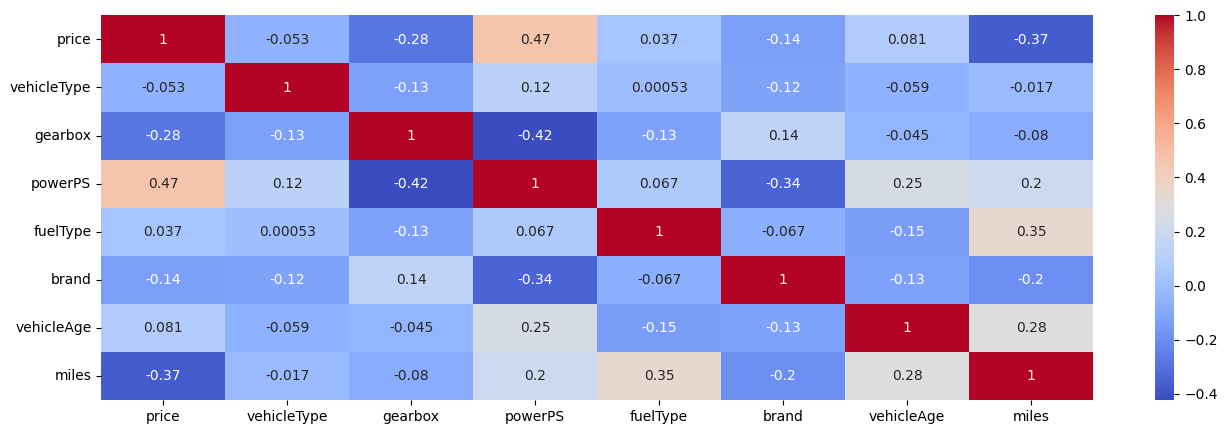

In [979]:
plt.figure(figsize=(16,5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
print("The below heat map shows a correlation between features. powerPs and fuelType provide the most infuence towards the price of the car.")

In [980]:
target_y = data['price']
training_data_x = data[['powerPS', 'brand', 'vehicleAge', 'miles']]

training_data_x

,powerPS,brand,vehicleAge,miles
1,190,1,12,77500
2,163,9,19,77500
8,125,6,9,18600
14,190,15,12,43400
18,136,6,16,93000
...,...,...,...,...
967,95,12,16,93000
970,170,12,15,77500
978,230,16,18,62000
986,99,8,10,18600


In [981]:
X = np.array(training_data_x)
y = np.array(target_y)

#### Sklearns Model

In [982]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Instantiate Model
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_predict = lin_reg.predict(X_test)

acc = lin_reg.score(X_test, y_test)

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('Accuracy:', acc*100, '%')
print("weights:", lin_reg.coef_)
print("intercept:", lin_reg.intercept_)


RMSE: 6814.1397472207445
Accuracy: 31.854271227529008 %
weights: [ 81.54835541 -62.49417844 156.71207914  -0.18466282]
intercept: 10105.973341205055


Text(0.5, 1.0, 'Price From Dataset Vs Price Predicted By Model')

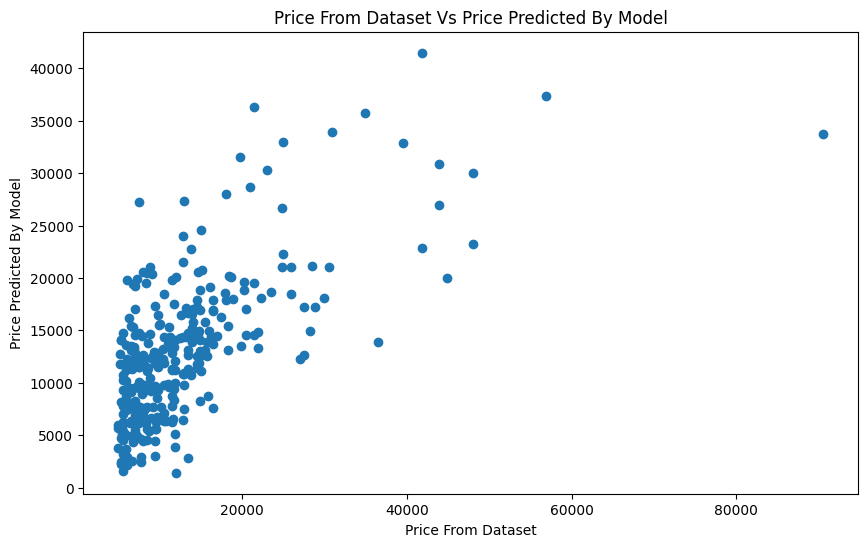

In [983]:
plt.scatter(y, lin_reg.predict(X))
plt.xlabel('Price From Dataset')
plt.ylabel('Price Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6)
plt.title("Price From Dataset Vs Price Predicted By Model")


In [984]:
#Create a CSV from the training data
#data.to_csv('training_data.csv', index=None)

#### Data to compare with Java model

<p>
RMSE: 6814.1397472207445
</p>
<p>
Accuracy: 31.854271227529008 %
</p>
<p>
weights: [ 81.54835541 -62.49417844 156.71207914  -0.18466282]
</p>
<p>
intercept: 10105.973341205055
</p>